In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
connection = sqlite3.connect('travel.sqlite')
cursor = connection.cursor()

In [4]:
table = pd.read_sql('''select * from sqlite_master where type ='table';''', connection) # query to extract tables from the file

In [5]:
table

,type,name,tbl_name,rootpage,sql
0,table,aircrafts_data,aircrafts_data,2,CREATE TABLE aircrafts_data (\r\n aircraft_...
1,table,airports_data,airports_data,3,CREATE TABLE airports_data (\r\n airport_co...
2,table,boarding_passes,boarding_passes,4,CREATE TABLE boarding_passes (\r\n ticket_n...
3,table,bookings,bookings,5,CREATE TABLE bookings (\r\n book_ref charac...
4,table,flights,flights,6,CREATE TABLE flights (\r\n flight_id intege...
5,table,seats,seats,7,CREATE TABLE seats (\r\n aircraft_code char...
6,table,ticket_flights,ticket_flights,8,CREATE TABLE ticket_flights (\r\n ticket_no...
7,table,tickets,tickets,9,CREATE TABLE tickets (\r\n ticket_no charac...


In [6]:
table_list =table.iloc[:,1]

In [7]:
aircrafts_data = pd.read_sql('''select * from aircrafts_data''', connection)

In [8]:
aircrafts_data

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600
5,319,"{""en"": ""Airbus A319-100"", ""ru"": ""Аэробус A319-...",6700
6,733,"{""en"": ""Boeing 737-300"", ""ru"": ""Боинг 737-300""}",4200
7,CN1,"{""en"": ""Cessna 208 Caravan"", ""ru"": ""Сессна 208...",1200
8,CR2,"{""en"": ""Bombardier CRJ-200"", ""ru"": ""Бомбардье ...",2700


In [9]:
airports_data = pd.read_sql('''select * from airports_data''', connection)
airports_data

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin
...,...,...,...,...,...
99,MMK,"{""en"": ""Murmansk Airport"", ""ru"": ""Мурманск""}","{""en"": ""Murmansk"", ""ru"": ""Мурманск""}","(32.7508010864257812,68.7817001342773438)",Europe/Moscow
100,ABA,"{""en"": ""Abakan Airport"", ""ru"": ""Абакан""}","{""en"": ""Abakan"", ""ru"": ""Абакан""}","(91.3850021362304688,53.7400016784667969)",Asia/Krasnoyarsk
101,BAX,"{""en"": ""Barnaul Airport"", ""ru"": ""Барнаул""}","{""en"": ""Barnaul"", ""ru"": ""Барнаул""}","(83.5384979248046875,53.363800048828125)",Asia/Krasnoyarsk
102,AAQ,"{""en"": ""Anapa Vityazevo Airport"", ""ru"": ""Витяз...","{""en"": ""Anapa"", ""ru"": ""Анапа""}","(37.3473014831539984,45.002101898192997)",Europe/Moscow


In [10]:
boarding_passes = pd.read_sql('''select * from boarding_passes''', connection)
boarding_passes

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A
...,...,...,...,...
579681,0005434302871,19945,85,20F
579682,0005432892791,19945,86,21C
579683,0005434302869,19945,87,20E
579684,0005432802476,19945,88,21F


In [11]:
bookings = pd.read_sql('''select * from bookings''', connection)
bookings

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600
...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03,56000
262784,FFFF2C,2017-08-08 05:55:00+03,10800
262785,FFFF43,2017-07-20 20:42:00+03,78500
262786,FFFFA8,2017-08-08 04:45:00+03,28800


In [12]:
flights = pd.read_sql('''select * from flights''', connection)
flights

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N
...,...,...,...,...,...,...,...,...,...,...
33116,33117,PG0063,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03
33117,33118,PG0063,2017-07-28 19:25:00+03,2017-07-28 20:10:00+03,SKX,SVO,Arrived,CR2,2017-07-28 19:30:00+03,2017-07-28 20:15:00+03
33118,33119,PG0063,2017-09-08 19:25:00+03,2017-09-08 20:10:00+03,SKX,SVO,Scheduled,CR2,\N,\N
33119,33120,PG0063,2017-08-01 19:25:00+03,2017-08-01 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-01 19:26:00+03,2017-08-01 20:12:00+03


In [13]:
seats = pd.read_sql('''select * from seats''', connection)
seats

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business
...,...,...,...
1334,773,48H,Economy
1335,773,48K,Economy
1336,773,49A,Economy
1337,773,49C,Economy


In [14]:
ticket_flights = pd.read_sql('''select * from ticket_flights''', connection)
ticket_flights

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100
...,...,...,...,...
1045721,0005435097522,32094,Economy,5200
1045722,0005435097521,32094,Economy,5200
1045723,0005435104384,32094,Economy,5200
1045724,0005435104352,32094,Economy,5200


In [15]:
tickets = pd.read_sql('''select * from tickets''', connection)
tickets

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589
...,...,...,...
366728,0005435999869,D730BA,0474 690760
366729,0005435999870,D730BA,6535 751108
366730,0005435999871,A1AD46,1596 156448
366731,0005435999872,7B6A53,9374 822707


In [16]:
for table in table_list:
    print('\ntable:', table)
    column_info= connection.execute('PRAGMA table_info({})'.format(table))
    for column in column_info.fetchall():
        print(column)#[1:3])


table: aircrafts_data
(0, 'aircraft_code', 'character(3)', 1, None, 0)
(1, 'model', 'jsonb', 1, None, 0)
(2, 'range', 'INTEGER', 1, None, 0)

table: airports_data
(0, 'airport_code', 'character(3)', 1, None, 0)
(1, 'airport_name', 'jsonb', 1, None, 0)
(2, 'city', 'jsonb', 1, None, 0)
(3, 'coordinates', 'point', 1, None, 0)
(4, 'timezone', 'TEXT', 1, None, 0)

table: boarding_passes
(0, 'ticket_no', 'character(13)', 1, None, 0)
(1, 'flight_id', 'INTEGER', 1, None, 0)
(2, 'boarding_no', 'INTEGER', 1, None, 0)
(3, 'seat_no', 'character varying(4)', 1, None, 0)

table: bookings
(0, 'book_ref', 'character(6)', 1, None, 0)
(1, 'book_date', 'timestamp with time zone', 1, None, 0)
(2, 'total_amount', 'numeric(10,2)', 1, None, 0)

table: flights
(0, 'flight_id', 'INTEGER', 1, None, 0)
(1, 'flight_no', 'character(6)', 1, None, 0)
(2, 'scheduled_departure', 'timestamp with time zone', 1, None, 0)
(3, 'scheduled_arrival', 'timestamp with time zone', 1, None, 0)
(4, 'departure_airport', 'character

In [17]:
for table in table_list:
    print('\ntable:', table)
    df= pd.read_sql(f"select * from {table}", connection)
    print(df.isnull().sum())


table: aircrafts_data
aircraft_code    0
model            0
range            0
dtype: int64

table: airports_data
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64

table: boarding_passes
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64

table: bookings
book_ref        0
book_date       0
total_amount    0
dtype: int64

table: flights
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64

table: seats
aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64

table: ticket_flights
ticket_no          0
flight_id          0
fare_conditions    0
amount             0
dtype: int64

table: tickets
ticket_no       0
book_ref        0
passenger_id    0
dtype: int64


In [18]:
#how many planes have more than 100 seats 
data= pd.read_sql("select * from seats", connection)
data

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business
...,...,...,...
1334,773,48H,Economy
1335,773,48K,Economy
1336,773,49A,Economy
1337,773,49C,Economy


In [19]:
data= pd.read_sql("select * from aircrafts_data", connection)
data

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600
5,319,"{""en"": ""Airbus A319-100"", ""ru"": ""Аэробус A319-...",6700
6,733,"{""en"": ""Boeing 737-300"", ""ru"": ""Боинг 737-300""}",4200
7,CN1,"{""en"": ""Cessna 208 Caravan"", ""ru"": ""Сессна 208...",1200
8,CR2,"{""en"": ""Bombardier CRJ-200"", ""ru"": ""Бомбардье ...",2700


In [20]:
ans= pd.read_sql('''select aircraft_code, count(1) from seats group by aircraft_code
                 having count(1)>100''', connection)
ans

,aircraft_code,count(1)
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402


In [21]:
#number of tickets booked and total amount earned with each day 
ans2= pd.read_sql('''select count(tickets.ticket_no), bookings.book_date as dat, sum(bookings.total_amount)
                    from tickets 
                    inner join bookings
                    on bookings.book_ref=tickets.book_ref
                    group by tickets.book_ref''', connection)
ans2.dtypes

count(tickets.ticket_no)       int64
dat                           object
sum(bookings.total_amount)     int64
dtype: object

In [22]:
ans3= pd.read_sql('''select *
                    from tickets 
                    inner join bookings
                    on bookings.book_ref=tickets.book_ref
                    ''', connection)
ans3['book_date']=pd.to_datetime(ans3['book_date'])
ans3.dtypes

ticket_no                                      object
book_ref                                       object
passenger_id                                   object
book_ref                                       object
book_date       datetime64[ns, pytz.FixedOffset(180)]
total_amount                                    int64
dtype: object

In [23]:
ans3['date']=ans3['book_date'].dt.date
ans3.groupby('date')[['date']].count()

,date
date,
2017-06-21,6
2017-06-22,12
2017-06-23,28
2017-06-24,106
2017-06-25,266
2017-06-26,499
2017-06-27,1028
2017-06-28,1678
2017-06-29,2765


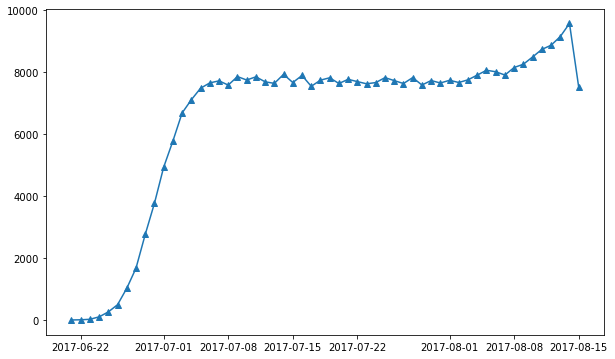

In [24]:
x=ans3.groupby('date')[['date']].count()
plt.figure(figsize=(10,6))
plt.plot(x.index, x['date'], marker='^')

In [25]:
ans3.groupby('date')[['total_amount']].sum()

,total_amount
date,
2017-06-21,916100
2017-06-22,1536300
2017-06-23,3114800
2017-06-24,10279900
2017-06-25,24652200
2017-06-26,48710400
2017-06-27,88733500
2017-06-28,147624200
2017-06-29,248677900


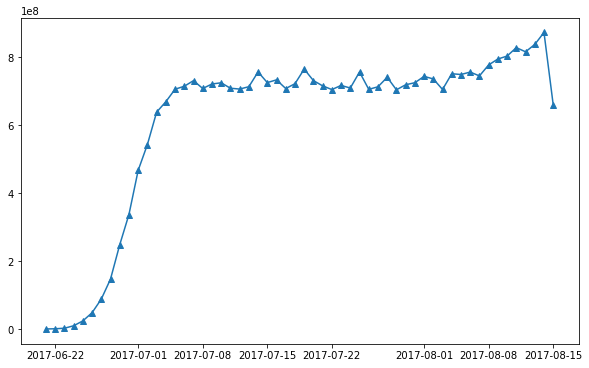

In [26]:

y=ans3.groupby('date')[['total_amount']].sum()
plt.figure(figsize=(10,6))
plt.plot(y.index, y['total_amount'], marker='^')

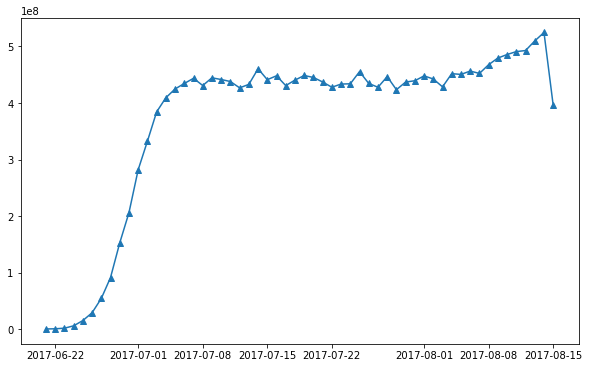

In [27]:
data2 = pd.read_sql('''select * from bookings''', connection)
data2['book_date']=pd.to_datetime(data2['book_date'])
data2['date']=data2['book_date'].dt.date
y=data2.groupby('date')[['total_amount']].sum()
plt.figure(figsize=(10,6))
plt.plot(y.index, y['total_amount'], marker='^')

In [28]:
#Calculate the the average charges for each aircraft with different fare conditions

In [32]:
ans4= pd.read_sql('''select fare_conditions, aircraft_code, avg(amount) from flights
                    join ticket_flights
                    on flights.flight_id=ticket_flights.flight_id
                    group by fare_conditions, aircraft_code''', connection)

In [33]:
ans4

,fare_conditions,aircraft_code,avg(amount)
0,Business,319,113550.557703
1,Business,321,34435.662664
2,Business,733,41865.626175
3,Business,763,82839.842866
4,Business,773,57779.909435
5,Business,SU9,33487.849829
6,Comfort,773,32740.552889
7,Economy,319,38311.402347
8,Economy,321,11534.974764
9,Economy,733,13985.152000


In [34]:
ans5= pd.read_sql('''select * from flights
                    join ticket_flights
                    on flights.flight_id=ticket_flights.flight_id
                    ''', connection)

In [35]:
ans5.groupby(['fare_conditions', 'aircraft_code'])['amount'].mean()

fare_conditions  aircraft_code
Business         319              113550.557703
                 321               34435.662664
                 733               41865.626175
                 763               82839.842866
                 773               57779.909435
                 SU9               33487.849829
Comfort          773               32740.552889
Economy          319               38311.402347
                 321               11534.974764
                 733               13985.152000
                 763               27594.721829
                 773               19265.225693
                 CN1                6568.552345
                 CR2               13207.661102
                 SU9               11220.183400
Name: amount, dtype: float64

<AxesSubplot:xlabel='aircraft_code', ylabel='avg(amount)'>

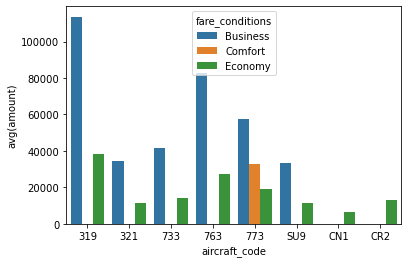

In [36]:
import seaborn as sns
sns.barplot(data= ans4, x='aircraft_code', y='avg(amount)', hue='fare_conditions')